<a href="https://colab.research.google.com/github/GuiLanza/Python-DNC/blob/main/DNC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier




In [ ]:
caminho_arquivo = '/content/streaming_data.csv'

codificacao = 'latin-1'  # Ou outra codificação que seja adequada para o arquivo

# Abrir o arquivo CSV usando a codificação especificada
dataframe = pd.read_csv(caminho_arquivo, encoding=codificacao)

# Realizar operações com o dataframe
# Por exemplo, exibir as primeiras linhas do dataframe
print(dataframe.head())

    Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0  49.0    Male            4700.0                3.0             Basic   
1  69.0  Female            6107.0                2.0          Standard   
2  44.0    Male            6374.0                3.0           Premium   
3  26.0    Male               NaN                5.0             Basic   
4  18.0     NaN            1948.0                3.0             Basic   

   Num_streaming_services  Num_active_profiles  Avg_rating  Churned  \
0                     NaN                    3         NaN      0.0   
1                     NaN                    1        2.14      0.0   
2                     1.0                    1        1.91      1.0   
3                     NaN                    2         NaN      NaN   
4                     NaN                    3        3.88      0.0   

                                User_id  
0  a271aa56-bcfc-4f0a-91f7-b773de6b86a4  
1  fe14b048-770b-4619-8ec6-485b0969ae31  
2 

In [ ]:
from IPython.display import display

# Exibe toda a tabela
display(dataframe)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,NaN,4,NaN,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [ ]:
dataframe.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object

In [ ]:
descricao_estatistica = dataframe.describe()

In [ ]:
valores_faltantes = dataframe.isna().sum()

print(valores_faltantes)

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


In [ ]:
# 1. Substituir valores "NaN" por 0 nas colunas especificadas
colunas_substituir_nan_por_zero = ["Time_on_platform", "Num_streaming_services", "Churned", "Avg_rating", "Devices_connected"]
dataframe[colunas_substituir_nan_por_zero] = dataframe[colunas_substituir_nan_por_zero].fillna(0)


In [ ]:
# Verificar se a substituição foi realizada corretamente
print(dataframe.isna().sum())

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64


In [ ]:
# 2. Dropar linhas nulas nas colunas Gender, Subscription_type e Age
colunas_dropar_nulas = ["Gender", "Subscription_type", "Age"]
dataframe = dataframe.dropna(subset=colunas_dropar_nulas)

# Verificar se as linhas nulas foram removidas corretamente
print(dataframe.isna().sum())

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64


In [ ]:
# 3. Transformar valores 0 e 1 da coluna "Churned" em "No" e "Yes"
mapeamento_churned = {0: "No", 1: "Yes"}
dataframe["Churned"] = dataframe["Churned"].map(mapeamento_churned)

# Verificar a coluna "Churned" após a transformação
print(dataframe["Churned"].unique())

['No' 'Yes']


In [ ]:
# 4. Transformar valores floats em valores inteiros
colunas_para_inteiro = ["Age","Time_on_platform", "Num_streaming_services", "Devices_connected"]
dataframe[colunas_para_inteiro] = dataframe[colunas_para_inteiro].astype(int)

# Verificar os tipos de dados após a transformação
print(dataframe.dtypes)

Age                         int64
Gender                     object
Time_on_platform            int64
Devices_connected           int64
Subscription_type          object
Num_streaming_services      int64
Num_active_profiles         int64
Avg_rating                float64
Churned                    object
User_id                    object
dtype: object


Valores faltantes em y_test: 0
Distribuição das previsões:
 Series([], dtype: int64)
Melhores parâmetros encontrados pelo Grid Search: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Acurácia: nan
Precisão: 1.0
Recall: 1.0
F1-score: 1.0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


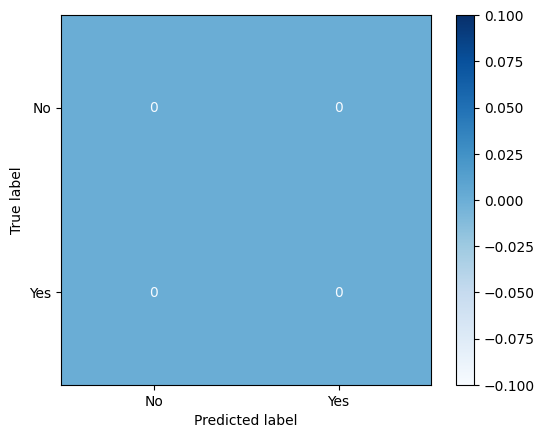

In [ ]:
# a. Definir variáveis X e y para o modelo
X = dataframe.drop(columns=['Churned'])
y = dataframe['Churned']

# Transformar as colunas categóricas usando get_dummies para criarmos variáveis dummy (one-hot encoding)
X = pd.get_dummies(X)

# Reduzir o tamanho do DataFrame para uma amostra menor
X, _, y, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# b. Realizar a montagem do grid search com um número menor de combinações
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X, y)

# c. Realizar o Tunning (ajuste fino)
best_params = grid_search.best_estimator_.get_params()
model_tuned = RandomForestClassifier(**best_params)
model_tuned.fit(X, y)

# d. Realizar a modelagem usando o Random Forest ajustado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model_tuned.predict(X_test)

# Converter os rótulos das classes para 'No' e 'Yes'
class_labels = {0: 'No', 1: 'Yes'}
y_test_labels = y_test.map(class_labels)
y_pred_labels = pd.Series(y_pred).map(class_labels)

# Filtrar valores desconhecidos
valid_labels = ['No', 'Yes']
y_test_labels = y_test_labels[y_test_labels.isin(valid_labels)]
y_pred_labels = y_pred_labels[y_pred_labels.isin(valid_labels)]

# e. Verificar se há valores faltantes no conjunto de testes
print("Valores faltantes em y_test:", y_test.isnull().sum())

# f. Verificar a distribuição das previsões
print("Distribuição das previsões:\n", y_pred_labels.value_counts())

# g. Plotar matriz de confusão
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=valid_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=valid_labels)
disp.plot(cmap='Blues', values_format='.0f')

# h. Printar métricas
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, pos_label='Yes', zero_division=1)
recall = recall_score(y_test_labels, y_pred_labels, pos_label='Yes', zero_division=1)
f1 = f1_score(y_test_labels, y_pred_labels, pos_label='Yes', zero_division=1)

print("Melhores parâmetros encontrados pelo Grid Search:", best_params)
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)